NumPy Support
=============

The magnitude of a Pint quantity can be of any numerical scalar type, and you are free
to choose it according to your needs. For numerical applications requiring arrays, it is
quite convenient to use [NumPy ndarray](http://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.html) (or [ndarray-like types supporting NEP-18](https://numpy.org/neps/nep-0018-array-function-protocol.html)),
and therefore these are the array types supported by Pint.

First, we import the relevant packages:

In [1]:
# Import NumPy
import numpy as np

# Disable Pint's old fallback behavior (must come before importing Pint)
import os
os.environ['PINT_ARRAY_PROTOCOL_FALLBACK'] = "0"

# Import Pint
import pint
ureg = pint.UnitRegistry()
Q_ = ureg.Quantity

# Silence NEP 18 warning
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    Q_([])

and then we create a quantity the standard way

In [2]:
legs1 = Q_(np.asarray([3., 4.]), 'meter')
print(legs1)

[3.0 4.0] meter


In [3]:
legs1 = [3., 4.] * ureg.meter
print(legs1)

[3.0 4.0] meter


All usual Pint methods can be used with this quantity. For example:

In [4]:
print(legs1.to('kilometer'))

[0.003 0.004] kilometer


In [5]:
print(legs1.dimensionality)

[length]


In [6]:
try:
    legs1.to('joule')
except pint.DimensionalityError as exc:
    print(exc)

Cannot convert from 'meter' ([length]) to 'joule' ([length] ** 2 * [mass] / [time] ** 2)


NumPy functions are supported by Pint. For example if we define:

In [7]:
legs2 = [400., 300.] * ureg.centimeter
print(legs2)

[400.0 300.0] centimeter


we can calculate the hypotenuse of the right triangles with legs1 and legs2.

In [8]:
hyps = np.hypot(legs1, legs2)
print(hyps)

[5.0 5.0] meter


Notice that before the `np.hypot` was used, the numerical value of legs2 was
internally converted to the units of legs1 as expected.

Similarly, when you apply a function that expects angles in radians, a conversion
is applied before the requested calculation:

In [9]:
angles = np.arccos(legs2/hyps)
print(angles)

[0.6435011087932843 0.9272952180016123] radian


You can convert the result to degrees using usual unit conversion:

In [10]:
print(angles.to('degree'))

[36.86989764584401 53.13010235415599] degree


Applying a function that expects angles to a quantity with a different dimensionality
results in an error:

In [11]:
try:
    np.arccos(legs2)
except pint.DimensionalityError as exc:
    print(exc)

Cannot convert from 'centimeter' ([length]) to 'dimensionless' (dimensionless)


Function/Method Support
-----------------------

The following [ufuncs](http://docs.scipy.org/doc/numpy/reference/ufuncs.html) can be applied to a Quantity object:

- **Math operations**: `add`, `subtract`, `multiply`, `divide`, `logaddexp`, `logaddexp2`, `true_divide`, `floor_divide`, `negative`, `remainder`, `mod`, `fmod`, `absolute`, `rint`, `sign`, `conj`, `exp`, `exp2`, `log`, `log2`, `log10`, `expm1`, `log1p`, `sqrt`, `square`, `cbrt`, `reciprocal`
- **Trigonometric functions**: `sin`, `cos`, `tan`, `arcsin`, `arccos`, `arctan`, `arctan2`, `hypot`, `sinh`, `cosh`, `tanh`, `arcsinh`, `arccosh`, `arctanh`
- **Comparison functions**: `greater`, `greater_equal`, `less`, `less_equal`, `not_equal`, `equal`
- **Floating functions**: `isreal`, `iscomplex`, `isfinite`, `isinf`, `isnan`, `signbit`, `copysign`, `nextafter`, `modf`, `ldexp`, `frexp`, `fmod`, `floor`, `ceil`, `trunc`

And the following NumPy functions:

In [12]:
from pint.numpy_func import HANDLED_FUNCTIONS
print(sorted(list(HANDLED_FUNCTIONS)))

['alen', 'all', 'allclose', 'amax', 'amin', 'any', 'append', 'argmax', 'argmin', 'argsort', 'around', 'atleast_1d', 'atleast_2d', 'atleast_3d', 'average', 'block', 'broadcast_to', 'clip', 'column_stack', 'compress', 'concatenate', 'copy', 'copyto', 'count_nonzero', 'cross', 'cumprod', 'cumproduct', 'cumsum', 'diagonal', 'diff', 'dot', 'dstack', 'ediff1d', 'einsum', 'empty_like', 'expand_dims', 'fix', 'flip', 'full_like', 'gradient', 'hstack', 'insert', 'interp', 'intersect1d', 'isclose', 'iscomplex', 'isin', 'isreal', 'linalg.solve', 'linspace', 'mean', 'median', 'meshgrid', 'moveaxis', 'nan_to_num', 'nanargmax', 'nanargmin', 'nancumprod', 'nancumsum', 'nanmax', 'nanmean', 'nanmedian', 'nanmin', 'nanpercentile', 'nanstd', 'nansum', 'nanvar', 'ndim', 'nonzero', 'ones_like', 'pad', 'percentile', 'ptp', 'ravel', 'reshape', 'resize', 'result_type', 'rollaxis', 'rot90', 'round_', 'searchsorted', 'shape', 'size', 'sort', 'squeeze', 'stack', 'std', 'sum', 'swapaxes', 'tile', 'transpose', 'tra

And the following [NumPy ndarray methods](http://docs.scipy.org/doc/numpy/reference/arrays.ndarray.html#array-methods):

- `argmax`, `argmin`, `argsort`, `astype`, `clip`, `compress`, `conj`, `conjugate`, `cumprod`, `cumsum`, `diagonal`, `dot`, `fill`, `flatten`, `flatten`, `item`, `max`, `mean`, `min`, `nonzero`, `prod`, `ptp`, `put`, `ravel`, `repeat`, `reshape`, `round`, `searchsorted`, `sort`, `squeeze`, `std`, `sum`, `take`, `trace`, `transpose`, `var`

Pull requests are welcome for any NumPy function, ufunc, or method that is not currently
supported.


Array Type Support
------------------

### Overview

When not wrapping a scalar type, a Pint `Quantity` can be considered a ["duck array"](https://numpy.org/neps/nep-0022-ndarray-duck-typing-overview.html), that is, an array-like type that implements (all or most of) NumPy's API for `ndarray`. Many other such duck arrays exist in the Python ecosystem, and Pint aims to work with as many of them as reasonably possible. To date, the following are specifically tested and known to work:

- xarray: `DataArray`, `Dataset`, and `Variable`
- Sparse: `COO`

and the following have partial support, with full integration planned:

- NumPy masked arrays (NOTE: Masked Array compatibility has changed with Pint 0.10 and versions of NumPy up to at least 1.18, see the example below)
- Dask arrays
- CuPy arrays

### Technical Commentary

Starting with version 0.10, Pint aims to interoperate with other duck arrays in a well-defined and well-supported fashion. Part of this support lies in implementing [`__array_ufunc__` to support NumPy ufuncs](https://numpy.org/neps/nep-0013-ufunc-overrides.html) and [`__array_function__` to support NumPy functions](https://numpy.org/neps/nep-0018-array-function-protocol.html). However, the central component to this interoperability is respecting a [type casting hierarchy](https://numpy.org/neps/nep-0018-array-function-protocol.html) of duck arrays. When all types in the hierarchy properly defer to those above it (in wrapping, arithmetic, and NumPy operations), a well-defined nesting and operator precedence order exists. When they don't, the graph of relations becomes cyclic, and the expected result of mixed-type operations becomes ambiguous.

For Pint, following this hierarchy means declaring a list of types that are above it in the hierarchy and to which it defers ("upcast types") and assuming all others are below it and wrappable by it ("downcast types"). To date, Pint's declared upcast types are:

- `PintArray`, as defined by pint-pandas
- `Series`, as defined by Pandas
- `DataArray`, `Dataset`, and `Variable`, as defined by xarray

(Note: if your application requires extension of this collection of types, it is available in Pint's API at `pint.compat.upcast_types`.)

While Pint assumes it can wrap any other duck array (meaning, for now, those that implement `__array_function__`, `shape`, `ndim`, and `dtype`, at least until [NEP 30](https://numpy.org/neps/nep-0030-duck-array-protocol.html) is implemented), there are a few common types that Pint explicitly tests (or plans to test) for optimal interoperability. These are listed above in the overview section and included in the below chart.

This type casting hierarchy of ndarray-like types can be shown by the below acyclic graph, where solid lines represent declared support, and dashed lines represent planned support:

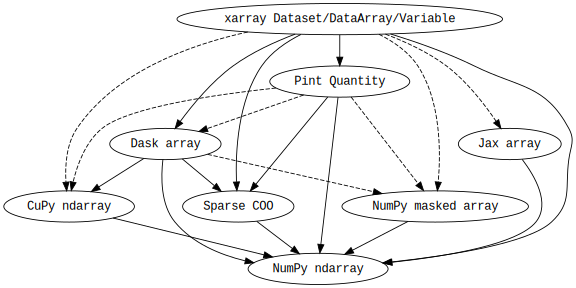

In [13]:
from graphviz import Digraph

g = Digraph(graph_attr={'size': '8,5'}, node_attr={'fontname': 'courier'})
g.edge('Dask array', 'NumPy ndarray')
g.edge('Dask array', 'CuPy ndarray')
g.edge('Dask array', 'Sparse COO')
g.edge('Dask array', 'NumPy masked array', style='dashed')
g.edge('CuPy ndarray', 'NumPy ndarray')
g.edge('Sparse COO', 'NumPy ndarray')
g.edge('NumPy masked array', 'NumPy ndarray')
g.edge('Jax array', 'NumPy ndarray')
g.edge('Pint Quantity', 'Dask array', style='dashed')
g.edge('Pint Quantity', 'NumPy ndarray')
g.edge('Pint Quantity', 'CuPy ndarray', style='dashed')
g.edge('Pint Quantity', 'Sparse COO')
g.edge('Pint Quantity', 'NumPy masked array', style='dashed')
g.edge('xarray Dataset/DataArray/Variable', 'Dask array')
g.edge('xarray Dataset/DataArray/Variable', 'CuPy ndarray', style='dashed')
g.edge('xarray Dataset/DataArray/Variable', 'Sparse COO')
g.edge('xarray Dataset/DataArray/Variable', 'NumPy ndarray')
g.edge('xarray Dataset/DataArray/Variable', 'NumPy masked array', style='dashed')
g.edge('xarray Dataset/DataArray/Variable', 'Pint Quantity')
g.edge('xarray Dataset/DataArray/Variable', 'Jax array', style='dashed')
g

### Examples

**xarray wrapping Pint Quantity**

In [14]:
import xarray as xr

# Load tutorial data
air = xr.tutorial.load_dataset('air_temperature')['air'][0]

# Convert to Quantity
air.data = Q_(air.data, air.attrs.pop('units', ''))

print(air)
print()
print(air.max())

<xarray.DataArray 'air' (lat: 25, lon: 53)>
<Quantity([[241.2     242.5     243.5     ... 232.79999 235.5     238.59999]
 [243.79999 244.5     244.7     ... 232.79999 235.29999 239.29999]
 [250.      249.79999 248.89    ... 233.2     236.39    241.7    ]
 ...
 [296.6     296.19998 296.4     ... 295.4     295.1     294.69998]
 [295.9     296.19998 296.79    ... 295.9     295.9     295.19998]
 [296.29    296.79    297.1     ... 296.9     296.79    296.6    ]], 'kelvin')>
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
    time     datetime64[ns] 2013-01-01
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  

**Pint Quantity wrapping Sparse COO**

In [15]:
from sparse import COO

np.random.seed(80243963)

x = np.random.random((100, 100, 100))
x[x < 0.9] = 0  # fill most of the array with zeros
s = COO(x)

q = s * ureg.m

print(q)
print()
print(np.mean(q))

<COO: shape=(100, 100, 100), dtype=float64, nnz=99598, fill_value=0.0> meter

0.09462606529121113 meter


**Pint Quantity wrapping NumPy Masked Array**

In [16]:
m = np.ma.masked_array([2, 3, 5, 7], mask=[False, True, False, True])

# Must create using Quantity class
print(repr(ureg.Quantity(m, 'm')))
print()

# DO NOT create using multiplication until
# https://github.com/numpy/numpy/issues/15200 is resolved, as
# unexpected behavior may result
print(repr(m * ureg.m))

<Quantity([2 -- 5 --], 'meter')>

masked_array(data=[<Quantity(2, 'meter')>, --, <Quantity(5, 'meter')>, --],
             mask=[False,  True, False,  True],
       fill_value='?',
            dtype=object)


**xarray wrapping Pint Quantity wrapping Dask array wrapping Sparse COO**

In [17]:
import dask.array as da

x = da.random.random((100, 100, 100), chunks=(100, 1, 1))
x[x < 0.95] = 0

data = xr.DataArray(
    Q_(x.map_blocks(COO), 'm'),
    dims=('z', 'y', 'x'),
    coords={
        'z': np.arange(100),
        'y': np.arange(100) - 50,
        'x': np.arange(100) * 1.5 - 20
    },
    name='test'
)

print(data)
print()
print(data.sel(x=125.5, y=-46).mean())

<xarray.DataArray 'test' (z: 100, y: 100, x: 100)>
<Quantity(dask.array<COO, shape=(100, 100, 100), dtype=float64, chunksize=(100, 1, 1), chunktype=sparse.COO>, 'meter')>
Coordinates:
  * z        (z) int64 0 1 2 3 4 5 6 7 8 9 10 ... 90 91 92 93 94 95 96 97 98 99
  * y        (y) int64 -50 -49 -48 -47 -46 -45 -44 -43 ... 43 44 45 46 47 48 49
  * x        (x) float64 -20.0 -18.5 -17.0 -15.5 ... 124.0 125.5 127.0 128.5

<xarray.DataArray 'test' ()>
<Quantity(dask.array<mean_agg-aggregate, shape=(), dtype=float64, chunksize=(), chunktype=numpy.ndarray>, 'meter')>
Coordinates:
    y        int64 -46
    x        float64 125.5


### Compatibility Packages

To aid in integration between various array types and Pint (such as by providing convenience methods), the following compatibility packages are available:

- [pint-pandas](https://github.com/hgrecco/pint-pandas)
- pint-xarray ([in development](https://github.com/hgrecco/pint/issues/849), initial alpha release planned for January 2020)

(Note: if you have developed a compatibility package for Pint, please submit a pull request to add it to this list!)

## Additional Comments

What follows is a short discussion about how NumPy support is implemented in Pint's `Quantity` Object.

For the supported functions, Pint expects certain units and attempts to convert the input (or inputs). For example, the argument of the exponential function (`numpy.exp`) must be dimensionless. Units will be simplified (converting the magnitude appropriately) and `numpy.exp` will be applied to the resulting magnitude. If the input is not dimensionless, a `DimensionalityError` exception will be raised.

In some functions that take 2 or more arguments (e.g. `arctan2`), the second argument is converted to the units of the first. Again, a `DimensionalityError` exception will be raised if this is not possible. ndarray or downcast type arguments are generally treated as if they were dimensionless quantities, whereas Pint defers to its declared upcast types by always returning `NotImplemented` when they are encountered (see above).

To achive these function and ufunc overrides, Pint uses the ``__array_function__`` and ``__array_ufunc__`` protocols respectively, as recommened by NumPy. This means that functions and ufuncs that Pint does not explicitly handle will error, rather than return a value with units stripped (in contrast to Pint's behavior prior to v0.10). For more
information on these protocols, see <https://docs.scipy.org/doc/numpy-1.17.0/user/basics.dispatch.html>.

This behaviour introduces some performance penalties and increased memory usage. Quantities that must be converted to other units require additional memory and CPU cycles. Therefore, for numerically intensive code, you might want to convert the objects first and then use directly the magnitude, such as by using Pint's `wraps` utility (see [wrapping](wrapping.html)).

Array interface protocol attributes (such as `__array_struct__` and
`__array_interface__`) are available on Pint Quantities by deferring to the corresponding `__array_*` attribute on the magnitude as casted to an ndarray. This has been found to be potentially incorrect and to cause unexpected behavior, and has therefore been deprecated. As of the next minor version of Pint (or when the `PINT_ARRAY_PROTOCOL_FALLBACK` environment variable is set to 0 prior to importing Pint as done at the beginning of this page), attempting to access these attributes will instead raise an AttributeError.